In [5]:
import pandas as pd
from matplotlib.pyplot import show
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import joblib

In [10]:
d=pd.read_excel("HouseData.xlsx")

In [11]:
df=pd.DataFrame(d)

In [12]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,20141022T000000,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,20141126T000000,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,20150129T000000,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227
3,9522300010,20150331T000000,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228
4,31000165,20140911T000000,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,3883800011,20141105T000000,82000,3,1.00,860,10426,1.0,No,No View,Average,6,1954,98146,47.4987,-122.341
21056,3028200080,20150324T000000,81000,2,1.00,730,9975,1.0,No,No View,Poor- Worn out,5,1943,98168,47.4808,-122.315
21057,8658300340,20140523T000000,80000,1,0.75,430,5050,1.0,No,No View,Fair- Badly worn,4,1912,98014,47.6499,-121.909
21058,40000362,20140506T000000,78000,2,1.00,780,16344,1.0,No,No View,Poor- Worn out,5,1942,98168,47.4739,-122.280


In [15]:
df["view"].unique().sum()

'No ViewAverageGoodFairExcellent'

id


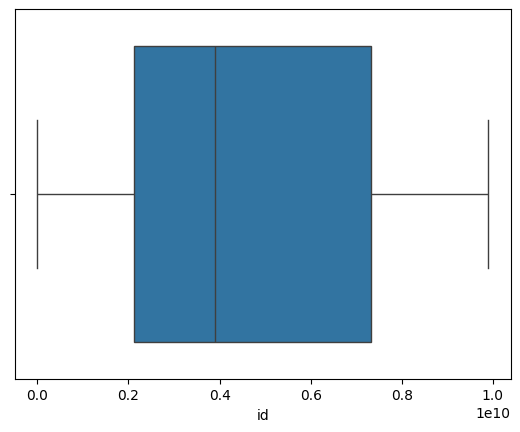

price


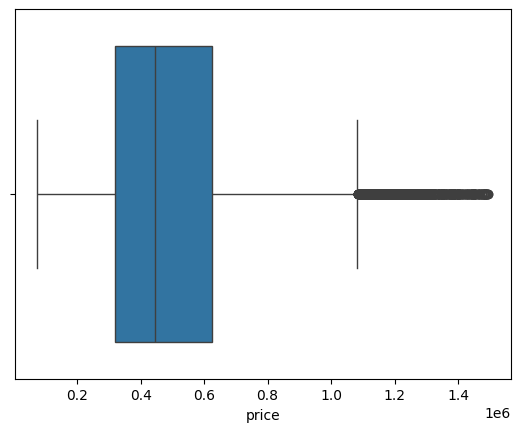

bedrooms


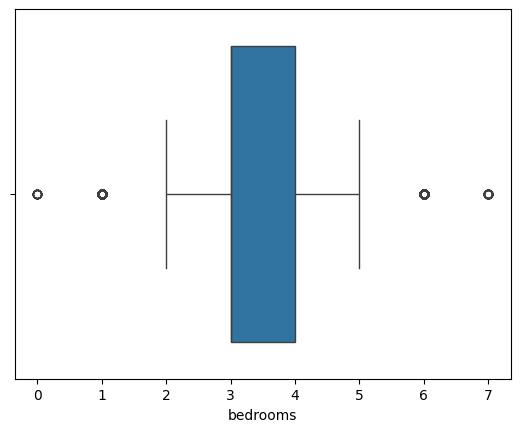

bathrooms


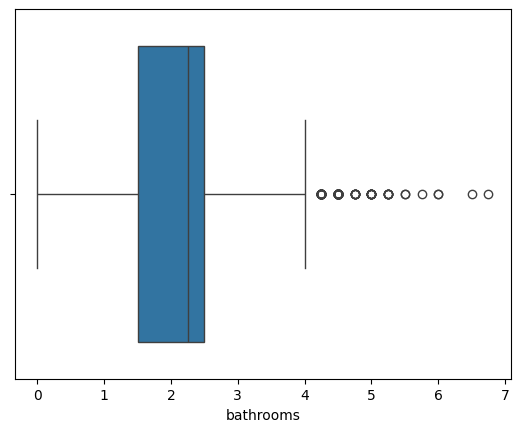

sqft_living


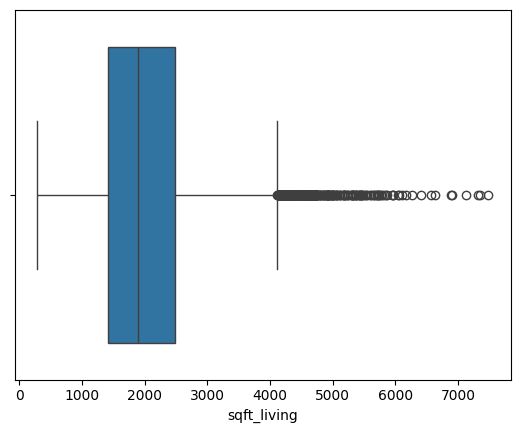

sqft_lot


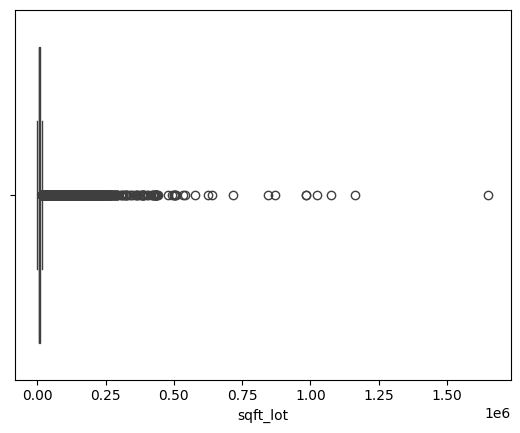

floors


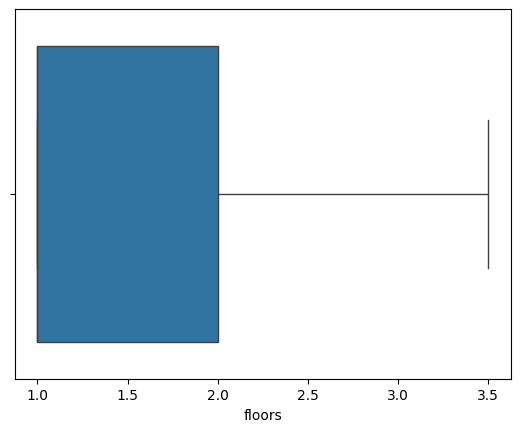

grade


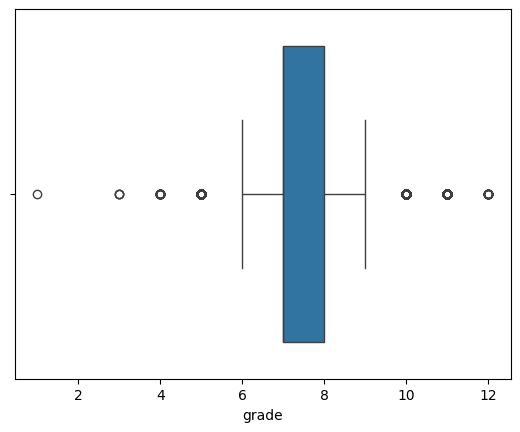

yr_built


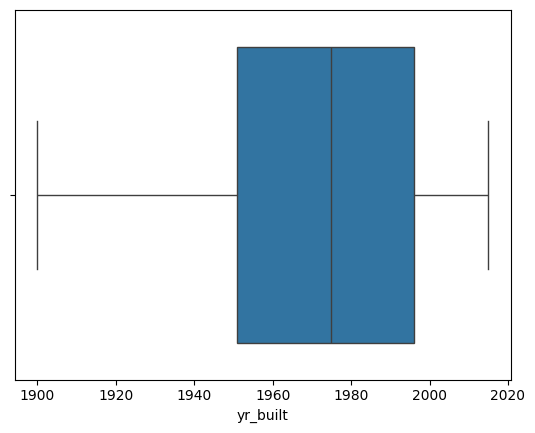

zipcode


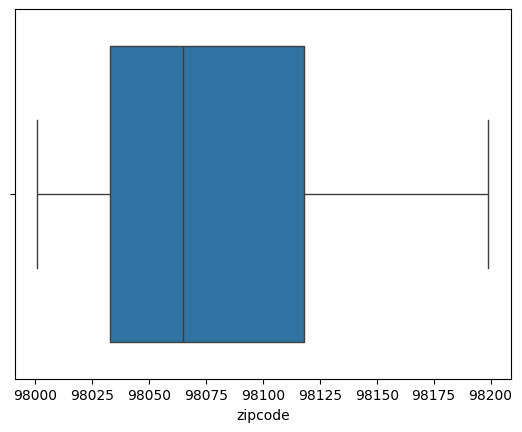

lat


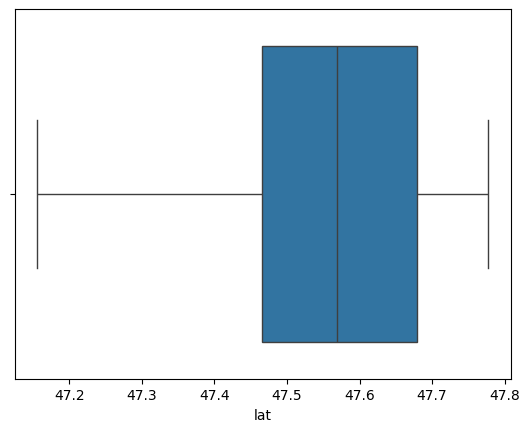

long


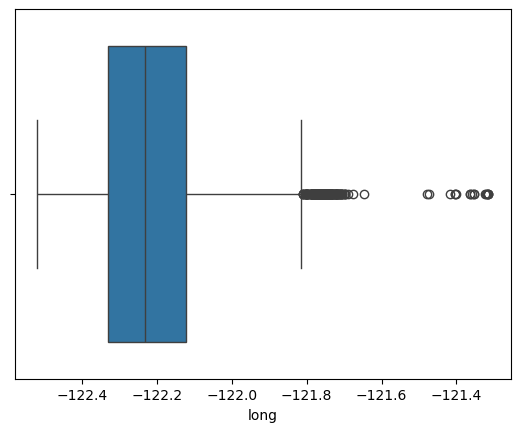

In [17]:
for i in df:
    if df[i].dtype!=object:
        sb.boxplot(data=df,x=i)
        print(i)
        show()

id


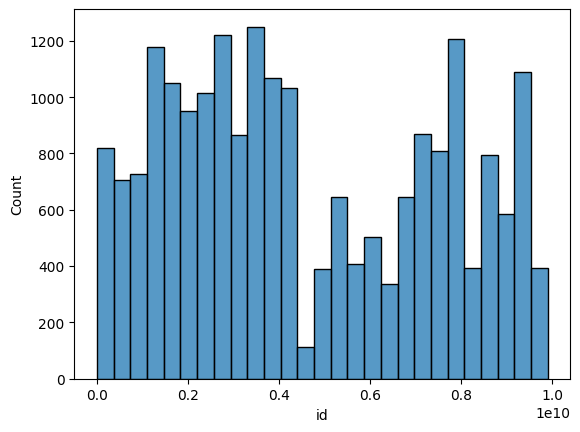

price


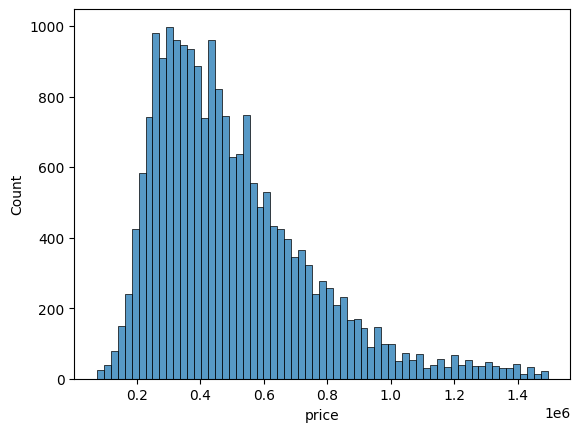

bedrooms


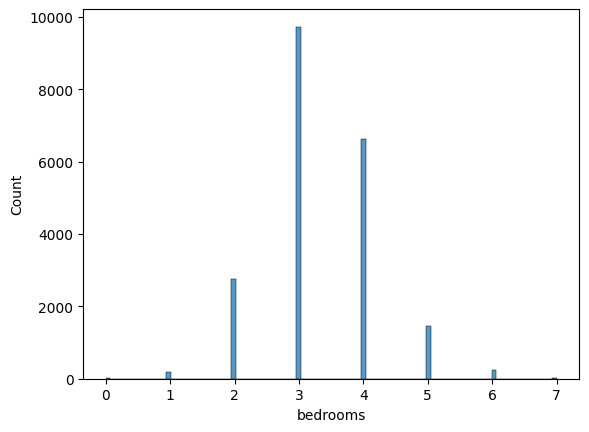

bathrooms


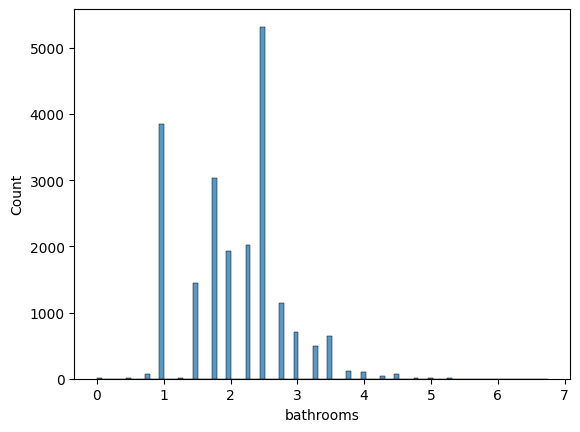

sqft_living


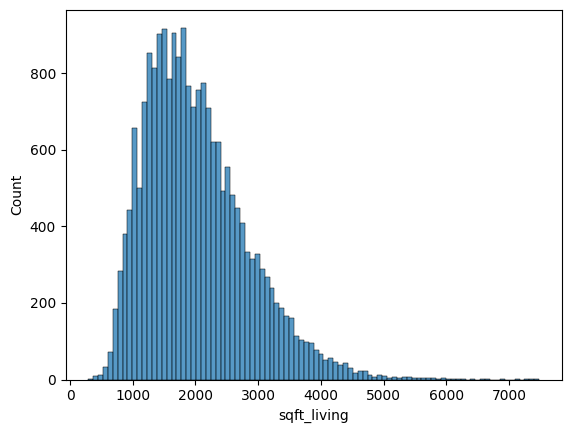

sqft_lot


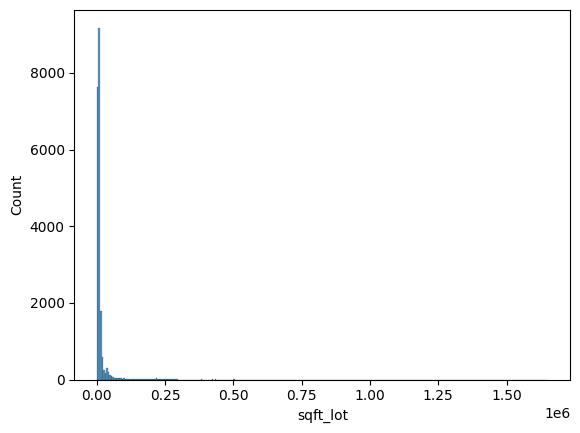

floors


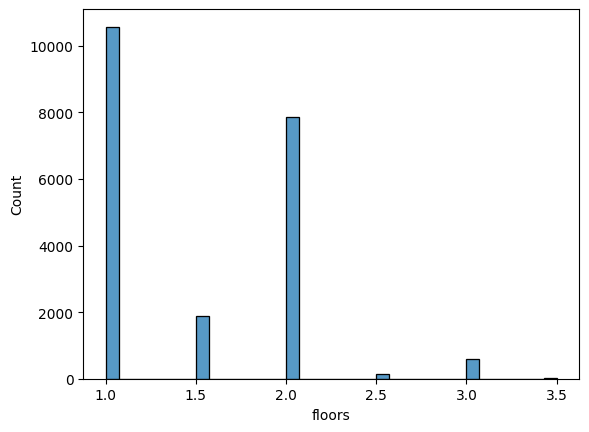

grade


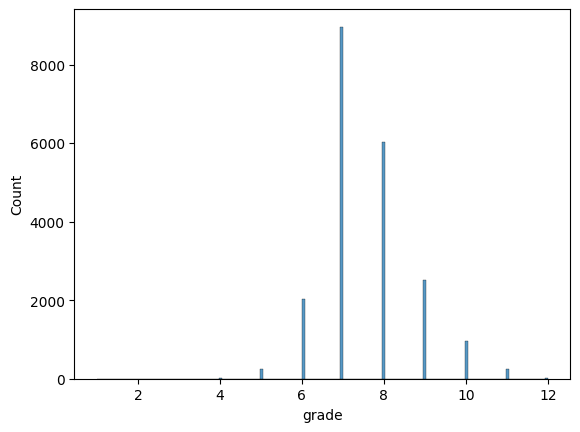

yr_built


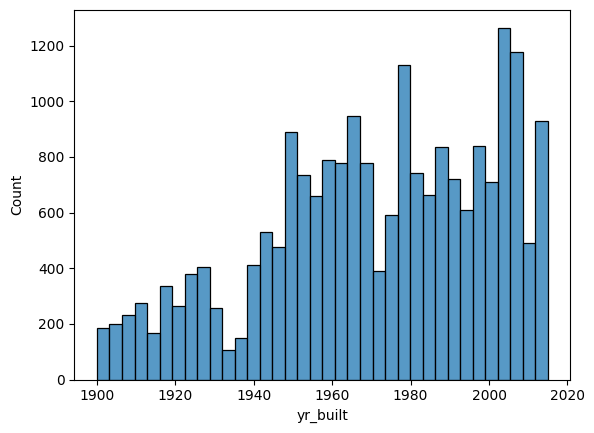

zipcode


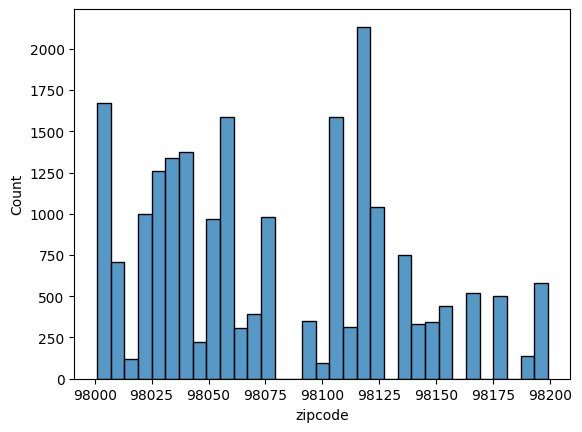

lat


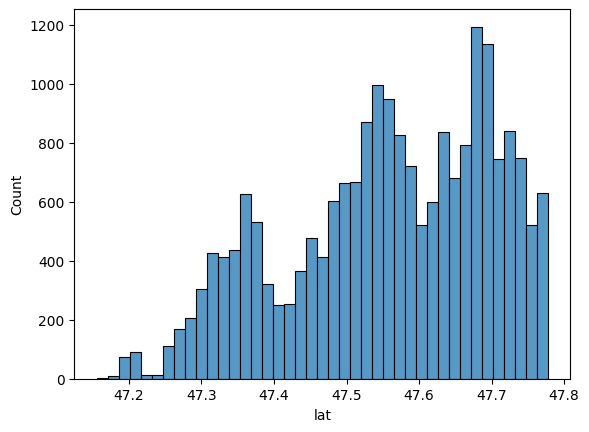

long


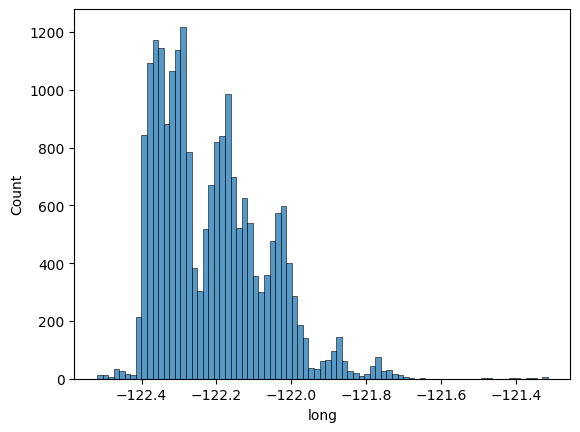

In [6]:
for i in df.columns:
    if df[i].dtype==int or df[i].dtype==float:
     sb.histplot(data=df,x=df[i])
     print(i)
     show()

In [18]:
df.isnull().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
dtype: int64

In [19]:
data_cleaning=df

In [20]:
data_cleaning

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,20141022T000000,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,20141126T000000,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,20150129T000000,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227
3,9522300010,20150331T000000,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228
4,31000165,20140911T000000,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,3883800011,20141105T000000,82000,3,1.00,860,10426,1.0,No,No View,Average,6,1954,98146,47.4987,-122.341
21056,3028200080,20150324T000000,81000,2,1.00,730,9975,1.0,No,No View,Poor- Worn out,5,1943,98168,47.4808,-122.315
21057,8658300340,20140523T000000,80000,1,0.75,430,5050,1.0,No,No View,Fair- Badly worn,4,1912,98014,47.6499,-121.909
21058,40000362,20140506T000000,78000,2,1.00,780,16344,1.0,No,No View,Poor- Worn out,5,1942,98168,47.4739,-122.280


In [21]:
data_cleaning["date"]=pd.to_datetime(data_cleaning["date"],format="%Y%m%dT%H%M%S")

In [22]:
data_cleaning

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227
3,9522300010,2015-03-31,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228
4,31000165,2014-09-11,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,3883800011,2014-11-05,82000,3,1.00,860,10426,1.0,No,No View,Average,6,1954,98146,47.4987,-122.341
21056,3028200080,2015-03-24,81000,2,1.00,730,9975,1.0,No,No View,Poor- Worn out,5,1943,98168,47.4808,-122.315
21057,8658300340,2014-05-23,80000,1,0.75,430,5050,1.0,No,No View,Fair- Badly worn,4,1912,98014,47.6499,-121.909
21058,40000362,2014-05-06,78000,2,1.00,780,16344,1.0,No,No View,Poor- Worn out,5,1942,98168,47.4739,-122.280


In [23]:
data_cleaning["year"]=data_cleaning["date"].dt.year

In [24]:
data_cleaning

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,year
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198,2014
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287,2014
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227,2015
3,9522300010,2015-03-31,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228,2015
4,31000165,2014-09-11,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,3883800011,2014-11-05,82000,3,1.00,860,10426,1.0,No,No View,Average,6,1954,98146,47.4987,-122.341,2014
21056,3028200080,2015-03-24,81000,2,1.00,730,9975,1.0,No,No View,Poor- Worn out,5,1943,98168,47.4808,-122.315,2015
21057,8658300340,2014-05-23,80000,1,0.75,430,5050,1.0,No,No View,Fair- Badly worn,4,1912,98014,47.6499,-121.909,2014
21058,40000362,2014-05-06,78000,2,1.00,780,16344,1.0,No,No View,Poor- Worn out,5,1942,98168,47.4739,-122.280,2014


In [25]:
data_cleaning.drop(labels="date", axis=1, inplace=True)

In [26]:
data_cleaning.drop(labels="id", axis=1, inplace=True)

In [27]:
data_cleaning.drop(labels="lat", axis=1, inplace=True)

In [28]:
data_cleaning.drop(labels="long", axis=1, inplace=True)

In [29]:
data_cleaning

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,year
0,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,2014
1,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,2014
2,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,2015
3,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,2015
4,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,82000,3,1.00,860,10426,1.0,No,No View,Average,6,1954,98146,2014
21056,81000,2,1.00,730,9975,1.0,No,No View,Poor- Worn out,5,1943,98168,2015
21057,80000,1,0.75,430,5050,1.0,No,No View,Fair- Badly worn,4,1912,98014,2014
21058,78000,2,1.00,780,16344,1.0,No,No View,Poor- Worn out,5,1942,98168,2014


In [30]:
data_cleaning["age"]=data_cleaning["year"]-data_cleaning["yr_built"]

In [31]:
data_cleaning

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,year,age
0,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,2014,52
1,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,2014,98
2,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,2015,48
3,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,2015,25
4,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,2014,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21055,82000,3,1.00,860,10426,1.0,No,No View,Average,6,1954,98146,2014,60
21056,81000,2,1.00,730,9975,1.0,No,No View,Poor- Worn out,5,1943,98168,2015,72
21057,80000,1,0.75,430,5050,1.0,No,No View,Fair- Badly worn,4,1912,98014,2014,102
21058,78000,2,1.00,780,16344,1.0,No,No View,Poor- Worn out,5,1942,98168,2014,72


In [32]:
data_cleaning.drop(labels="year", axis=1, inplace=True)

In [33]:
data_cleaning.drop(labels="yr_built", axis=1, inplace=True)

In [34]:
data_cleaning

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,98004,52
1,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,98122,98
2,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,98004,48
3,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,98034,25
4,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,98040,56
...,...,...,...,...,...,...,...,...,...,...,...,...
21055,82000,3,1.00,860,10426,1.0,No,No View,Average,6,98146,60
21056,81000,2,1.00,730,9975,1.0,No,No View,Poor- Worn out,5,98168,72
21057,80000,1,0.75,430,5050,1.0,No,No View,Fair- Badly worn,4,98014,102
21058,78000,2,1.00,780,16344,1.0,No,No View,Poor- Worn out,5,98168,72


In [70]:
X=data_cleaning.drop(labels=["price"],axis=1)
Y=data_cleaning[["price"]]

In [71]:
from sklearn.preprocessing import LabelEncoder

In [ ]:



categorical_cols = ['view', 'waterfront', 'condition']
encoders = {}
mappings = {}

for col in categorical_cols:
    le = LabelEncoder()
    
   
    mappings[col] = {label: code for code, label in enumerate(le.fit(X[col]).classes_)}

    X[col] = le.transform(X[col])
    
   
    encoders[col] = le


for col in categorical_cols:
    print(f"{col} mapping:", mappings[col])


view mapping: {'Average': 0, 'Excellent': 1, 'Fair': 2, 'Good': 3, 'No View': 4}
waterfront mapping: {'No': 0, 'Yes': 1}
condition mapping: {'Average': 0, 'Fair- Badly worn': 1, 'Good': 2, 'Poor- Worn out': 3, 'Very Good': 4}


In [73]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,4,3.25,3070,10375,2.0,0,4,0,10,98004,52
1,4,3.75,3770,4000,2.5,0,4,4,9,98122,98
2,4,2.50,2420,18480,1.0,0,4,2,9,98004,48
3,3,3.50,4560,14608,2.0,0,0,0,12,98034,25
4,5,3.50,3620,7821,2.0,0,0,0,10,98040,56
...,...,...,...,...,...,...,...,...,...,...,...
21055,3,1.00,860,10426,1.0,0,4,0,6,98146,60
21056,2,1.00,730,9975,1.0,0,4,3,5,98168,72
21057,1,0.75,430,5050,1.0,0,4,1,4,98014,102
21058,2,1.00,780,16344,1.0,0,4,3,5,98168,72


In [32]:
# removing outliers from data using IQR

In [74]:
data_Merge=pd.concat([X,Y],axis=1)

In [75]:
data_Merge

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age,price
0,4,3.25,3070,10375,2.0,0,4,0,10,98004,52,1495000
1,4,3.75,3770,4000,2.5,0,4,4,9,98122,98,1495000
2,4,2.50,2420,18480,1.0,0,4,2,9,98004,48,1490000
3,3,3.50,4560,14608,2.0,0,0,0,12,98034,25,1490000
4,5,3.50,3620,7821,2.0,0,0,0,10,98040,56,1490000
...,...,...,...,...,...,...,...,...,...,...,...,...
21055,3,1.00,860,10426,1.0,0,4,0,6,98146,60,82000
21056,2,1.00,730,9975,1.0,0,4,3,5,98168,72,81000
21057,1,0.75,430,5050,1.0,0,4,1,4,98014,102,80000
21058,2,1.00,780,16344,1.0,0,4,3,5,98168,72,78000


In [76]:
for col in data_Merge.columns:
    Q1 = data_Merge[col].quantile(0.25)
    Q3 = data_Merge[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    data_Merge[col] = data_Merge[col].clip(lower=lower_limit, upper=upper_limit)

X_clean = data_Merge.drop(labels=["price"], axis=1)
Y_clean = data_Merge[["price"]]

In [77]:
X_clean

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,4.0,3.25,3070,10375.0,2.0,0,4,0,9.5,98004,52
1,4.0,3.75,3770,4000.0,2.5,0,4,4,9.0,98122,98
2,4.0,2.50,2420,18480.0,1.0,0,4,2,9.0,98004,48
3,3.0,3.50,4110,14608.0,2.0,0,4,0,9.5,98034,25
4,5.0,3.50,3620,7821.0,2.0,0,4,0,9.5,98040,56
...,...,...,...,...,...,...,...,...,...,...,...
21055,3.0,1.00,860,10426.0,1.0,0,4,0,6.0,98146,60
21056,2.0,1.00,730,9975.0,1.0,0,4,3,5.5,98168,72
21057,1.5,0.75,430,5050.0,1.0,0,4,1,5.5,98014,102
21058,2.0,1.00,780,16344.0,1.0,0,4,3,5.5,98168,72


In [78]:
import numpy as np
Y_log = np.log1p(Y_clean)

In [79]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_clean)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_log, test_size=0.2, random_state=42)

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
Y_pred

c:\Users\siddhant\anaconda3\envs\housepred\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


array([12.14575777, 12.82456079, 12.32914356, ..., 13.79805519,
       13.27321455, 13.41861137], shape=(4212,))

In [82]:
Y_pred_original = np.expm1(Y_pred)

In [83]:
Y_test_original = np.expm1(Y_test)

In [84]:

# Evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(Y_test_original, Y_pred_original)
rmse = np.sqrt(mean_squared_error(Y_test_original, Y_pred_original))

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.7669489914444516
RMSE: 108129.52845743696


In [85]:
joblib.dump(model,"gradientboostmodel1.pkl")

['gradientboostmodel1.pkl']

In [86]:
joblib.dump(scaler, "scaler1.pkl")

['scaler1.pkl']